<a href="https://colab.research.google.com/github/habash2125/Small-ML-projects/blob/main/credit_cards_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#the link for the data
#https://www.kaggle.com/arjunbhasin2013/ccdata
data = pd.read_csv('CC GENERAL.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [ ]:
data.dropna(inplace= True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHA

In [ ]:
data.drop('CUST_ID', axis=1,inplace=True)

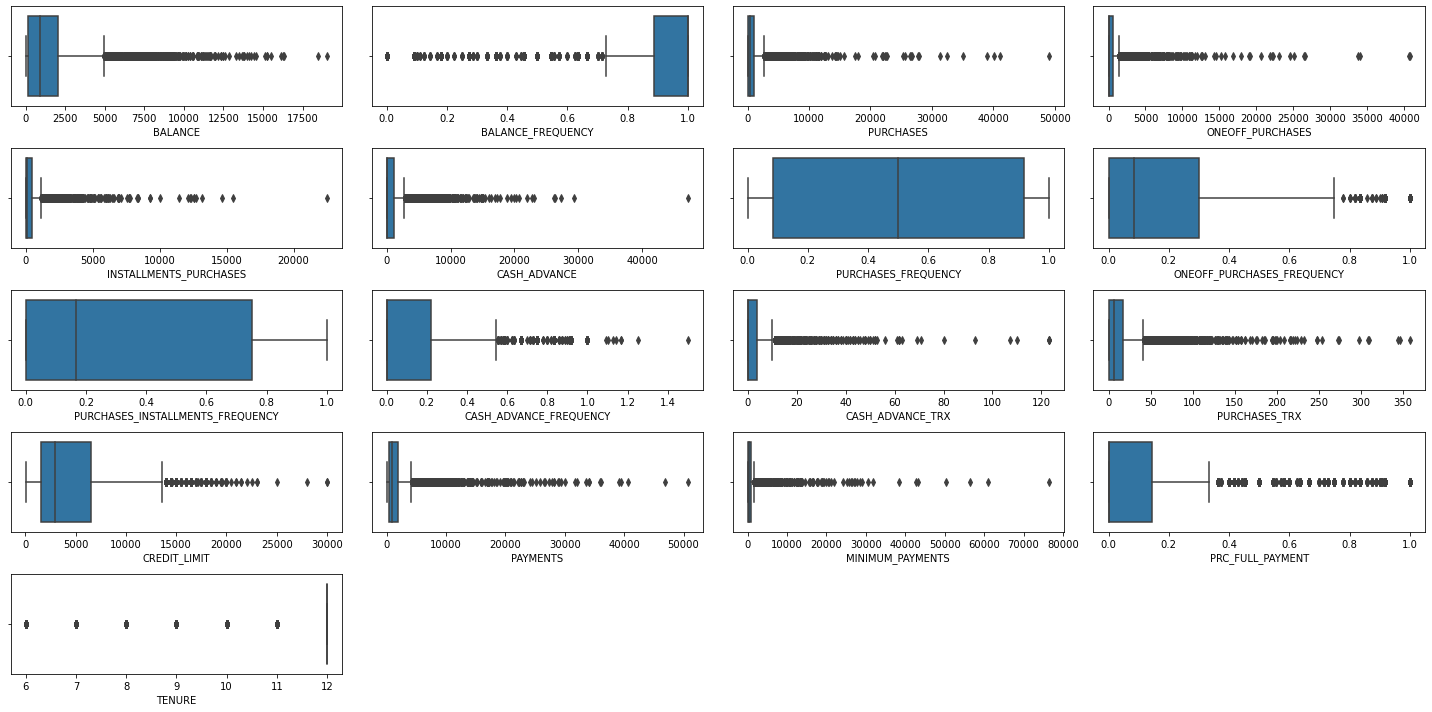

In [ ]:
fig = plt.figure(figsize=(20, 10))
for idx, col in enumerate(data.columns, 1):
    ax = fig.add_subplot(5, 4, idx)
    sns.boxplot(x=data[col], ax=ax)

plt.tight_layout()

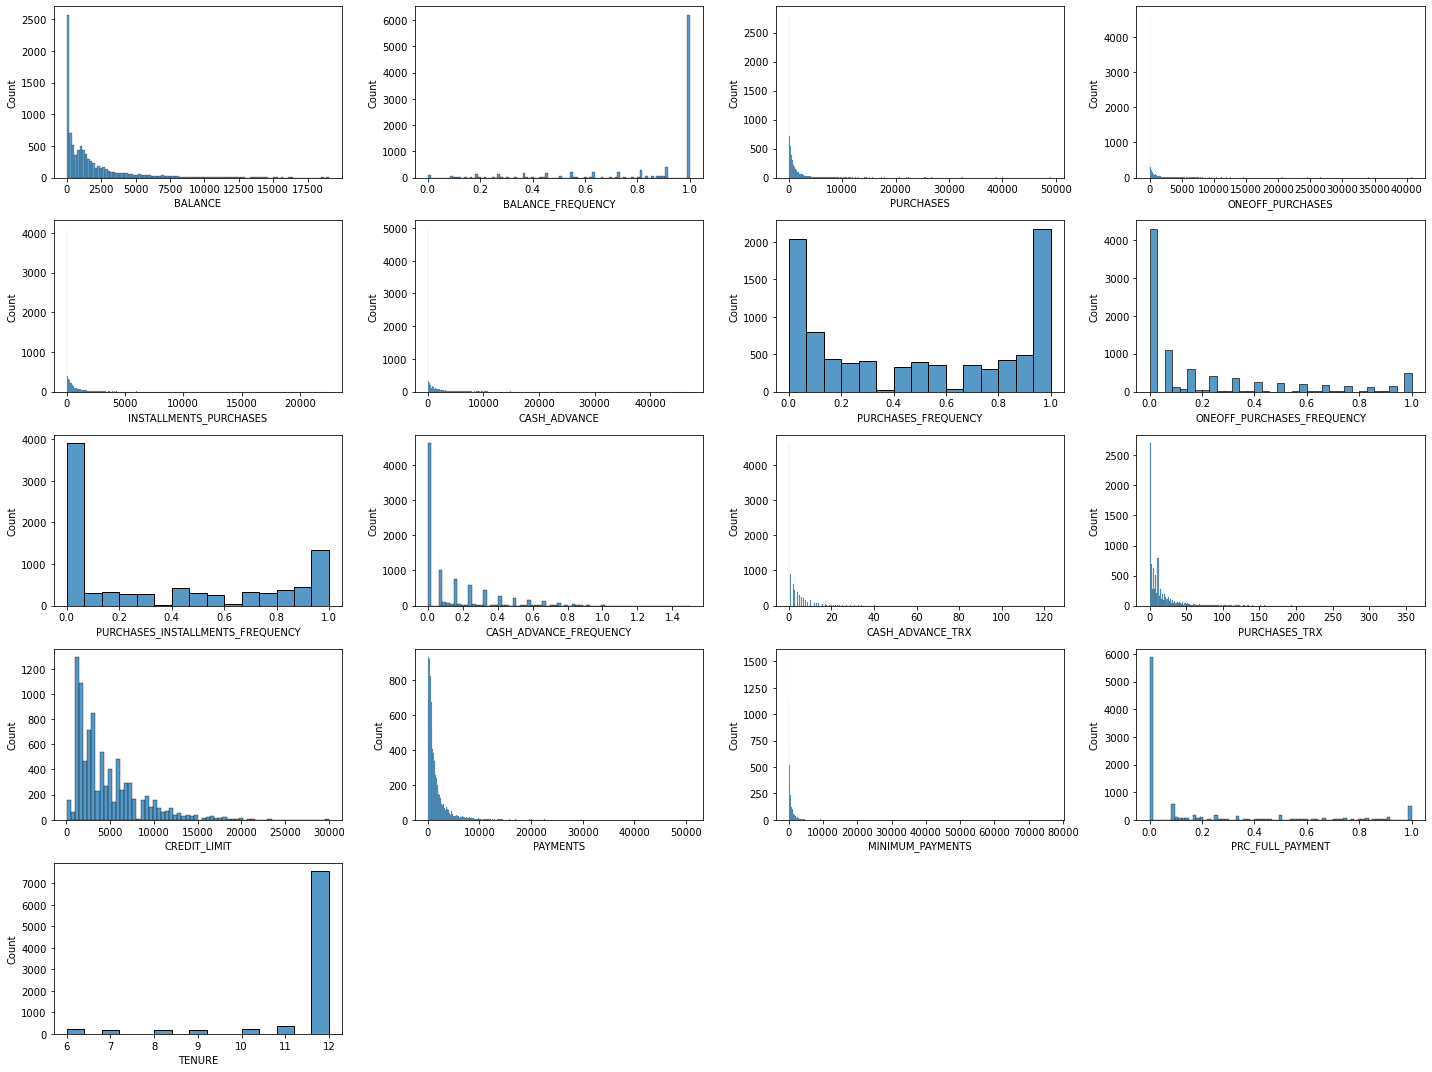

In [ ]:
fig = plt.figure(figsize=(20,15))
for i ,col in enumerate (data.columns,1):
    ax=fig.add_subplot(5,4,i)
    sns.histplot(x=data[col],ax=ax)
    
plt.tight_layout()

In [ ]:
data_std=data.sub(data.mean(axis=1),axis=0)
data_std=data.div(data.std(axis=1),axis=0)

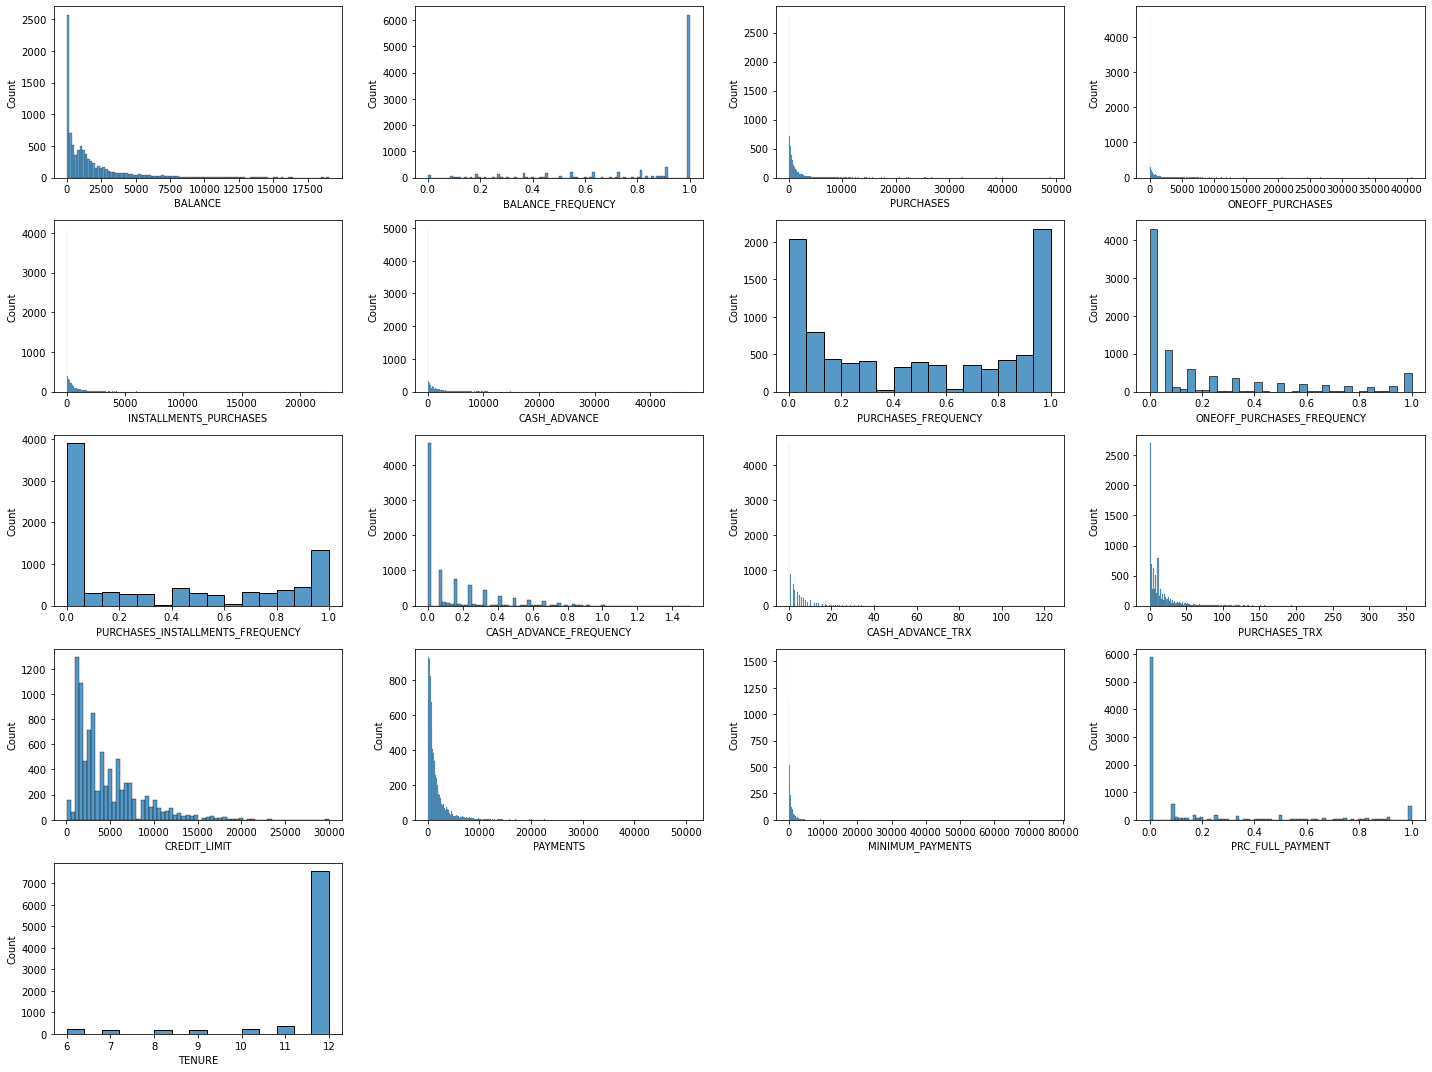

In [ ]:
fig = plt.figure(figsize=(20,15))
for i ,col in enumerate (data.columns,1):
    ax=fig.add_subplot(5,4,i)
    sns.histplot(x=data[col],ax=ax)
plt.tight_layout()

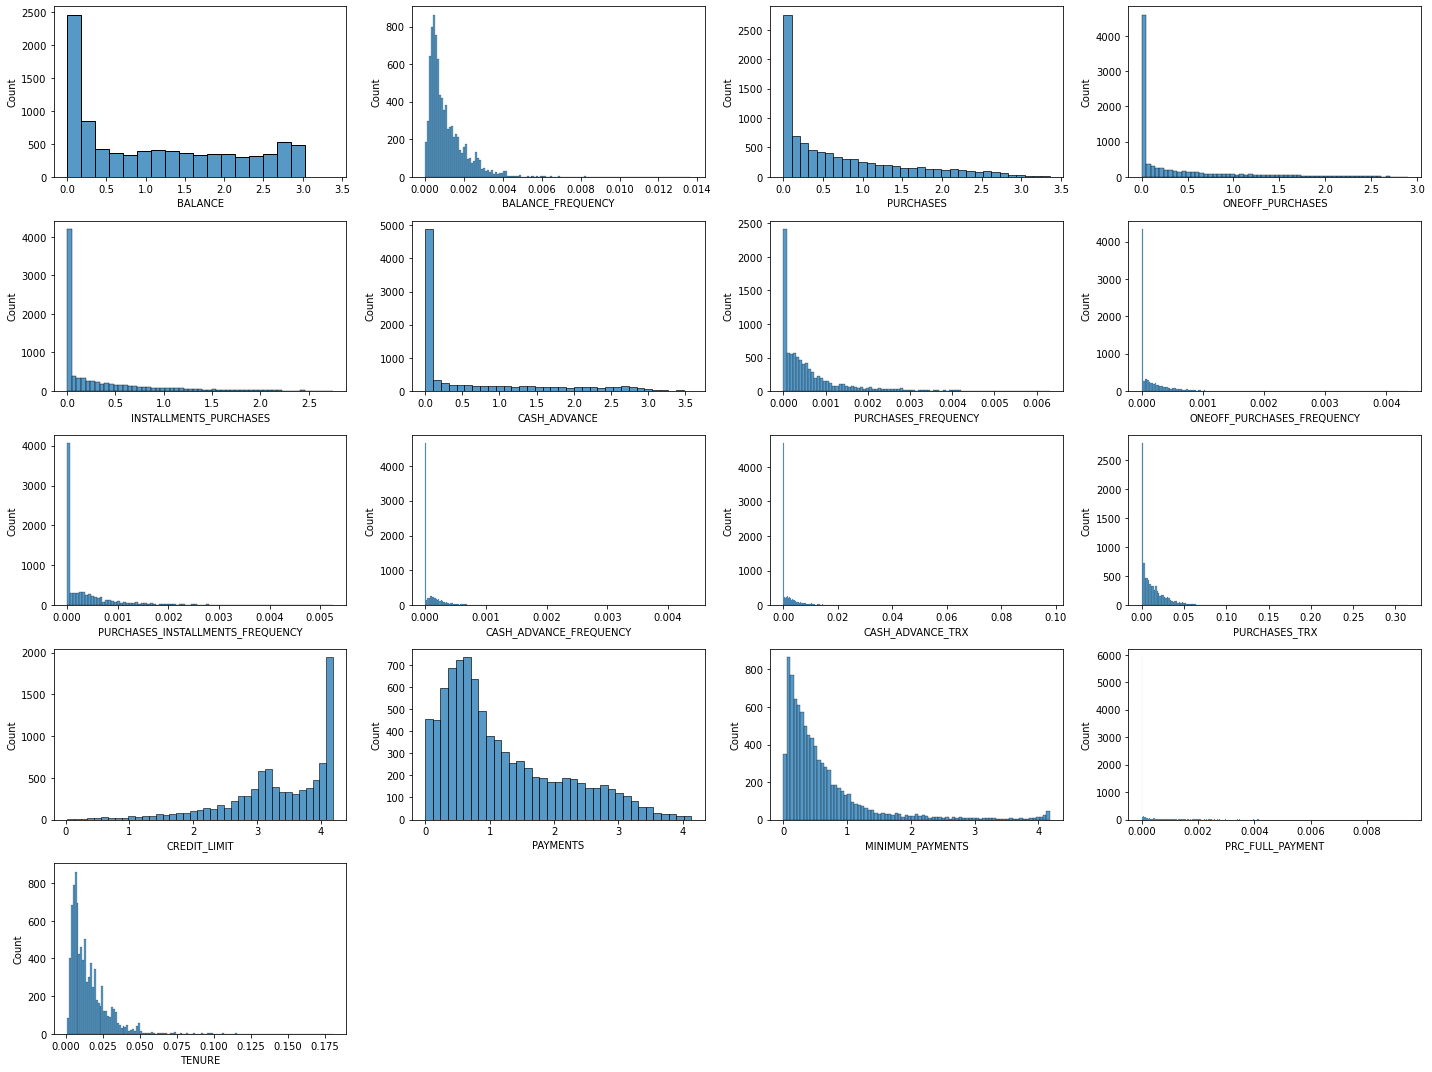

In [ ]:
fig = plt.figure(figsize=(20,15))
for i ,col in enumerate (data_std.columns,1):
    ax=fig.add_subplot(5,4,i)
    sns.histplot(x=data_std[col],ax=ax)
plt.tight_layout()

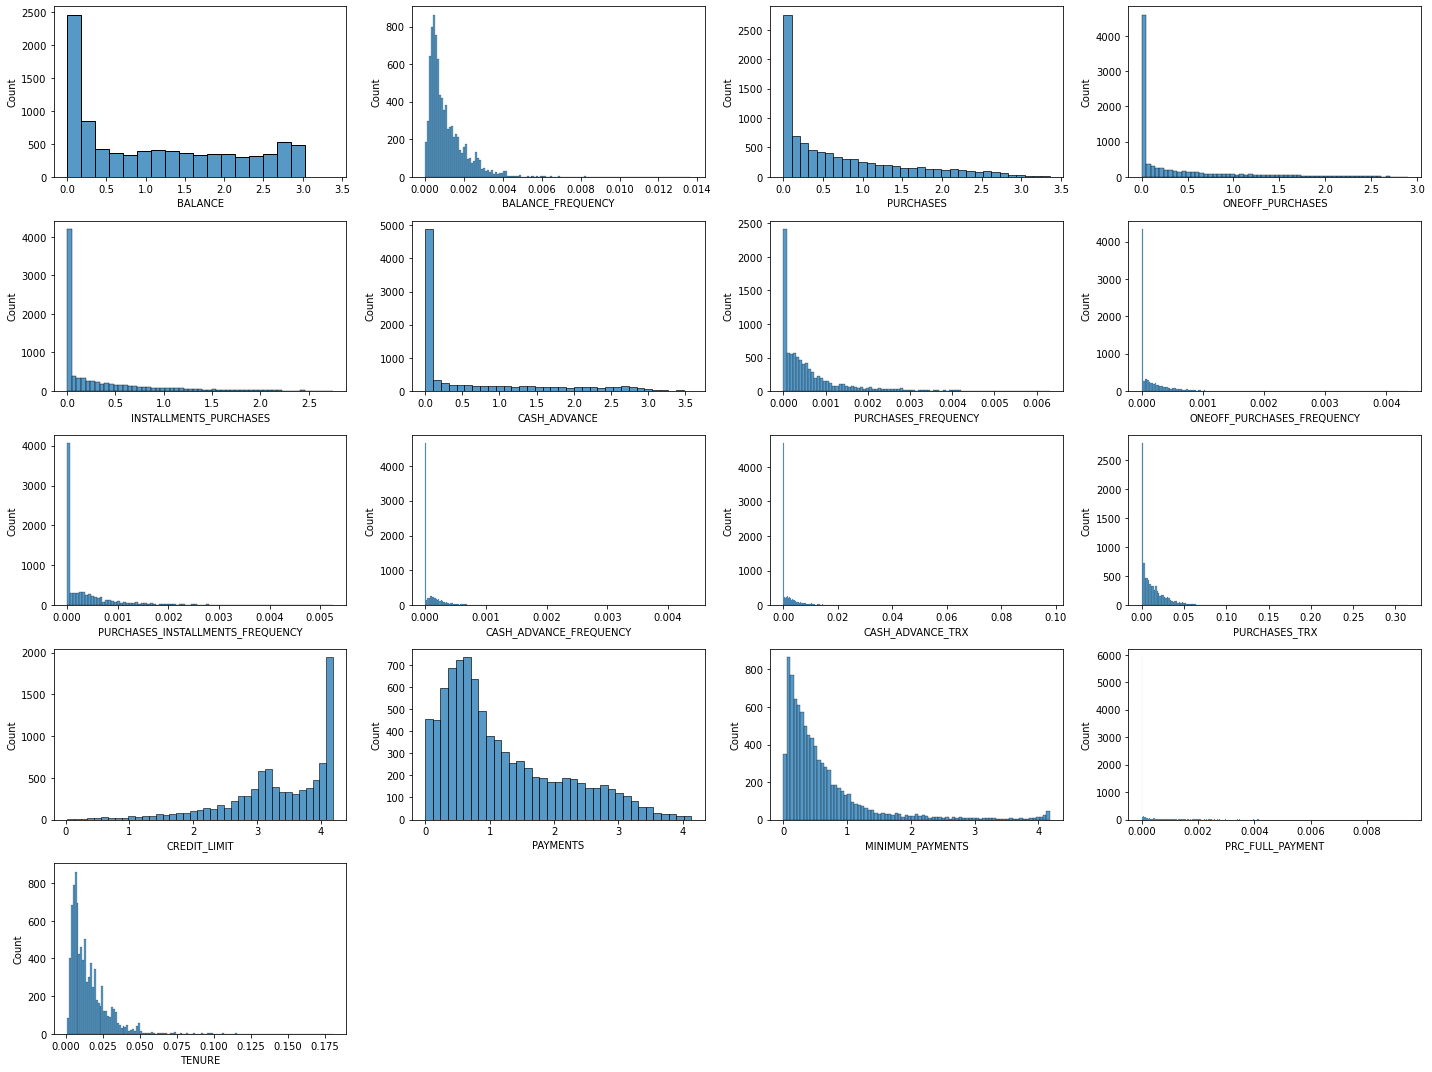

In [ ]:
fig = plt.figure(figsize=(20,15))
for i ,col in enumerate (data_std.columns,1):
    ax=fig.add_subplot(5,4,i)
    sns.histplot(x=data_std[col],ax=ax)
plt.tight_layout()

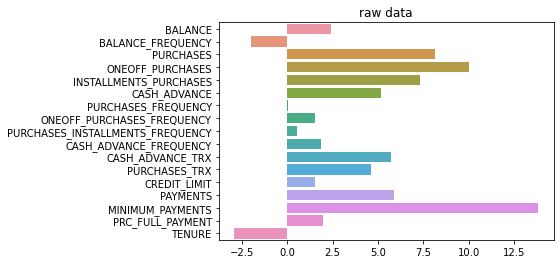

In [ ]:
data_skewness=data.skew()
sns.barplot(x=data_skewness.values,y=data_skewness.index)
plt.title("raw data");

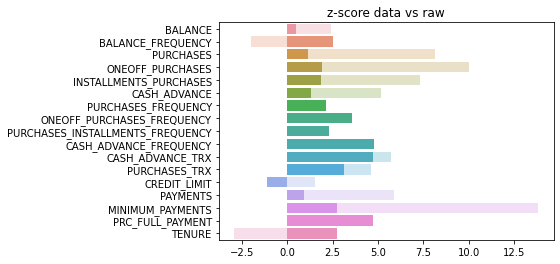

In [ ]:
data_std_skewness=data_std.skew()
sns.barplot(x=data_std_skewness.values,y=data_std_skewness.index);
sns.barplot(x=data_skewness.values,y=data_skewness.index,alpha =0.3)

plt.title("z-score data vs raw");

In [ ]:
data_log=np.log10(data+1)
data_sqrt=np.sqrt(data)

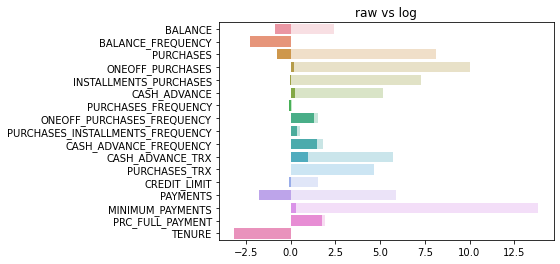

In [ ]:
data_log_skewness=data_log.skew()
sns.barplot(x=data_skewness.values,y=data_skewness.index,alpha =0.3)
sns.barplot(x=data_log_skewness.values,y=data_log_skewness.index)
plt.title("raw vs log");


In [ ]:
(data_skewness-data_log_skewness).sum()

68.11032909766796

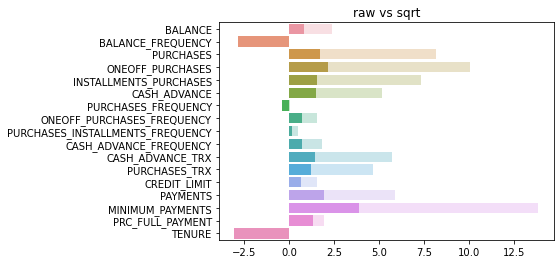

In [ ]:
data_sqrt_skewness=data_sqrt.skew()
sns.barplot(x=data_sqrt_skewness.values,y=data_sqrt_skewness.index)
sns.barplot(x=data_skewness.values,y=data_skewness.index,alpha =0.3)
plt.title("raw vs sqrt");


In [ ]:
(data_skewness-data_sqrt_skewness).sum()

52.203613701989966

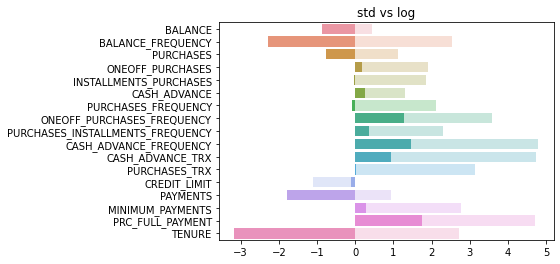

In [ ]:
sns.barplot(x=data_log_skewness.values,y=data_log_skewness.index)
sns.barplot(x=data_std_skewness.values,y=data_std_skewness.index,alpha=0.3);
plt.title("std vs log");

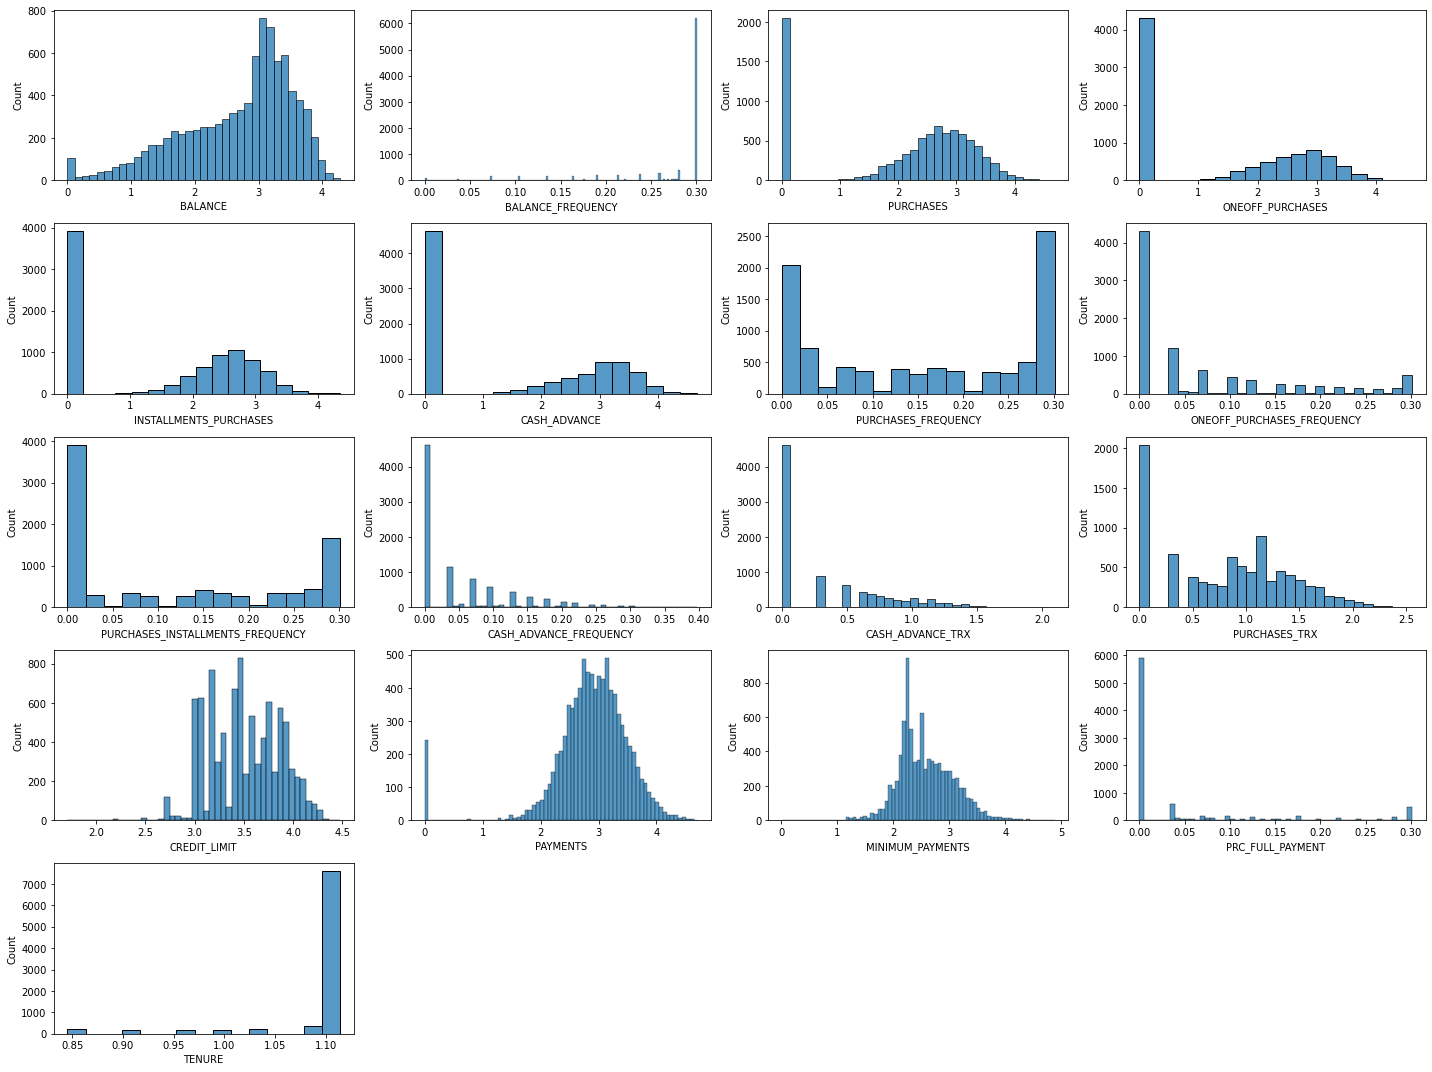

In [ ]:
fig = plt.figure(figsize=(20,15))
for i ,col in enumerate (data_log.columns,1):
    ax=fig.add_subplot(5,4,i)
    sns.histplot(x=data_log[col],ax=ax)
plt.tight_layout()

In [ ]:
#log was very useful so we will take it 

Standardiaze the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
f_data=pd.DataFrame( StandardScaler().fit_transform(data_log))


In [ ]:
f_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03
mean,4.737569e-16,-1.916074e-15,1.059743e-15,6.732673e-15,5.611533e-16,9.580621e-16,-4.533566e-16,1.278172e-14,1.422311e-15,8.001446e-16,1.069208e-15,-2.833556e-17,-4.857241e-15,3.247920e-17,-7.043198e-16,4.901283e-16,1.211472e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-3.061071e+00,-4.174804e+00,-1.680213e+00,-9.871985e-01,-1.087586e+00,-9.306359e-01,-1.302995e+00,-7.325429e-01,-9.583592e-01,-7.242936e-01,-8.100379e-01,-1.379434e+00,-5.079142e+00,-4.163779e+00,-5.042945e+00,-5.564088e-01,-4.406443e+00
25%,-6.454735e-01,1.077188e-01,-4.085542e-01,-9.871985e-01,-1.087586e+00,-9.306359e-01,-1.014336e+00,-7.325429e-01,-9.583592e-01,-7.242936e-01,-8.100379e-01,-8.748534e-01,-8.741168e-01,-4.233803e-01,-6.581433e-01,-5.564088e-01,3.471269e-01
50%,3.039534e-01,4.926028e-01,3.404191e-01,1.413749e-01,3.720783e-01,-9.306359e-01,1.592453e-01,-3.631143e-01,-4.114097e-01,-7.242936e-01,-8.100379e-01,1.343072e-01,-1.075291e-01,8.148696e-02,-1.446264e-01,-5.564088e-01,3.471269e-01
75%,7.283677e-01,4.926028e-01,7.245116e-01,9.723332e-01,9.080179e-01,1.036840e+00,1.043238e+00,4.783760e-01,1.027237e+00,5.561843e-01,7.845456e-01,7.246283e-01,8.355939e-01,5.818495e-01,6.458154e-01,7.460715e-02,3.471269e-01
max,1.834319e+00,4.926028e-01,2.023105e+00,2.282948e+00,2.163164e+00,2.086782e+00,1.196721e+00,2.466616e+00,1.501025e+00,5.122555e+00,3.965755e+00,2.903363e+00,2.701408e+00,2.645391e+00,4.555488e+00,2.719131e+00,3.471269e-01


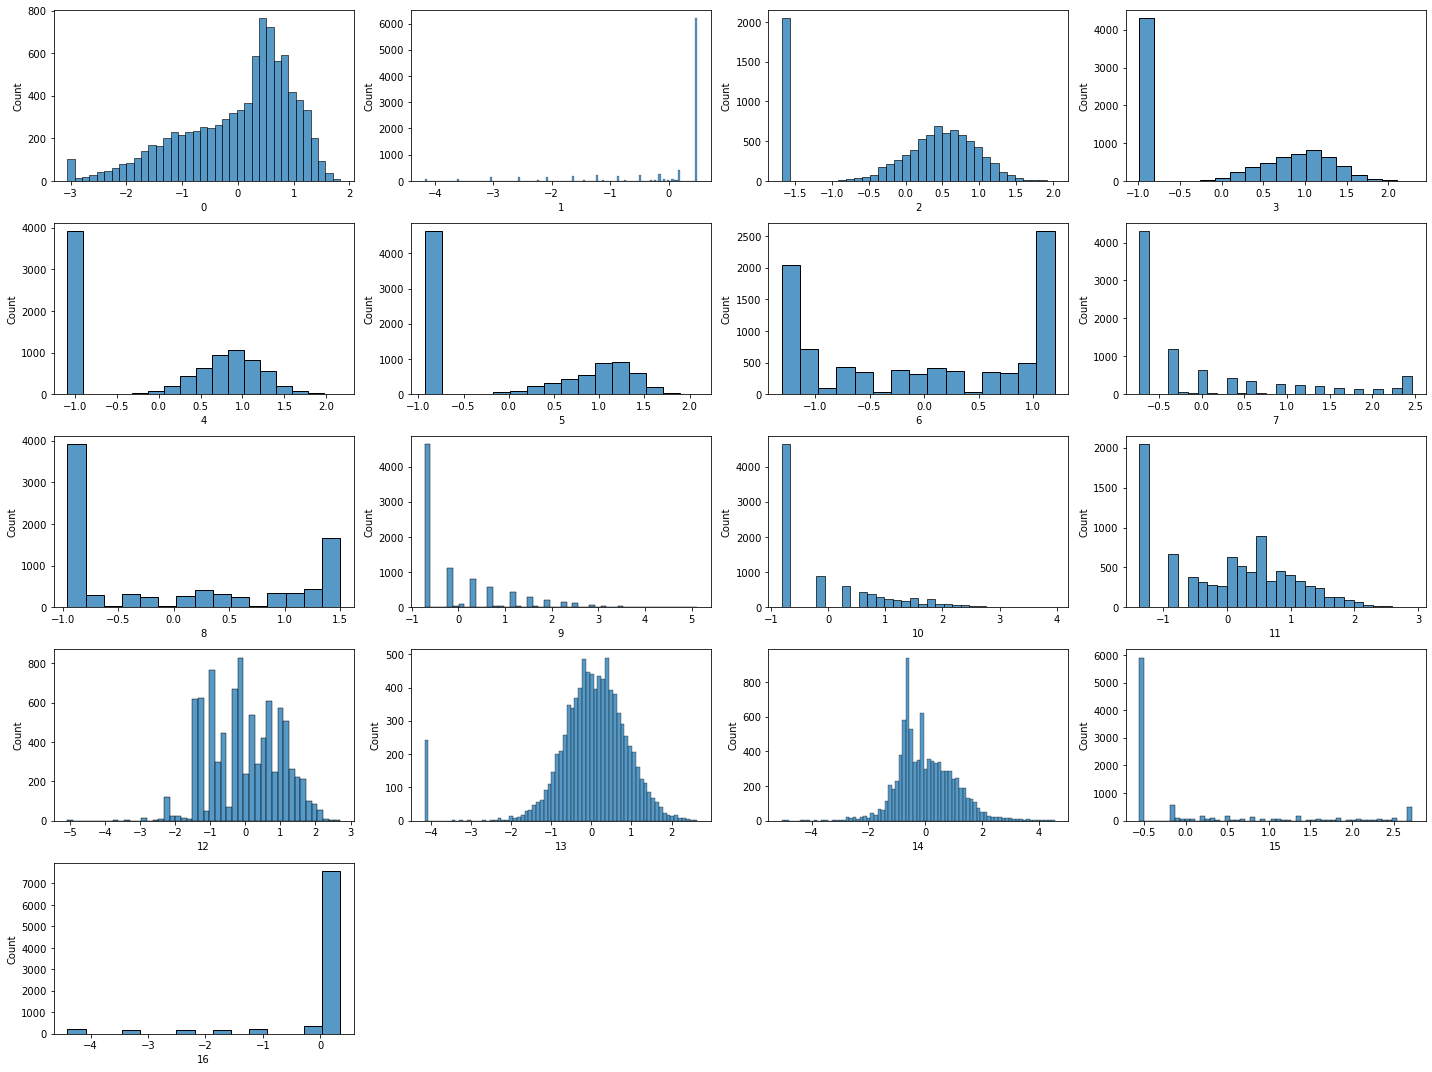

In [ ]:
fig = plt.figure(figsize=(20,15))
for i ,col in enumerate (f_data.columns,1):
    ax=fig.add_subplot(5,4,i)
    sns.histplot(x=f_data[col],ax=ax)
plt.tight_layout()

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

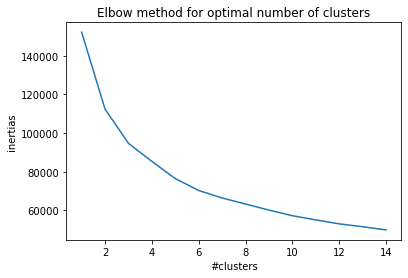

In [ ]:
inertias=[]

for i in range(1,15):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=0)
    kmeans.fit(f_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,15),inertias)
plt.title('Elbow method for optimal number of clusters')
plt.xlabel('#clusters')
plt.ylabel('inertias')
plt.show()

In [ ]:
df = pd.DataFrame ({"clusters_error":inertias , "num_clusters":range(1,15)})
elbow=KneeLocator(df['num_clusters'].values,df['clusters_error'].values,S=1.0,curve ='convex',direction='decreasing')
n=elbow.knee
print('best #clusters is ',n)

best #clusters is  5


In [ ]:
kmeans=KMeans(n_clusters=n)
pred=kmeans.fit_predict(f_data)


In [ ]:
for i in range(n):
    print("cluster ", i ,":",sum(pred==i))

cluster  0 : 1418
cluster  1 : 1897
cluster  2 : 2332
cluster  3 : 1374
cluster  4 : 1928


PCA

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_res=pd.DataFrame(data=pca.fit_transform(f_data),columns=["pc 1","pc 2"])
pca_res['clusters']=pred

In [ ]:
pca_res

,pc 1,pc 2,clusters
0,-0.256067,2.663164,3
1,-3.492153,-1.012552,2
2,1.464428,-1.287279,4
3,-1.276644,1.086691,3
4,-1.152994,1.349438,3
...,...,...,...
8944,1.739483,2.877106,1
8945,1.261668,2.186426,1
8946,1.072217,3.245541,1
8947,-2.778857,3.887531,3


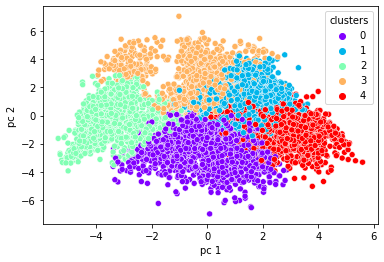

In [ ]:
sns.scatterplot(x='pc 1',y='pc 2',data=pca_res,hue="clusters",palette="rainbow");